# TME6 - SVM
----

Dans ce tme nous allons parler de machine learning, et plus particulièrement de la famille des SVM, acronyme de Support Vector Machines.
Un algorithme d’apprentissage automatique, et qui est très efficace dans les problèmes de classification.

In [74]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
from arftools import *
from matplotlib import cm
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from random import shuffle

Le SVM est une solution à ce problème de classification1. Le SVM appartient à la catégorie des classificateurs linéaires (qui utilisent une séparation linéaire des données)

Nous aborderons dans cette partie la famille des SVM, acronyme de Support Vector Machines.
Un algorithme d’apprentissage automatique, et qui est très efficace dans les problèmes de classification. Il appartient à la catégorie des classificateurs linéaires. 
Nous avons remarqué précédemment que la frontière de décision du perceptron n’est pas unique sachant qu’elle dépend du dernier ajustement et de plus, elle n’est pas optimale. Nous voulons une frontière de décision aussi loin que possible des exemples de chacune des classes afin d’avoir une meilleure capacité de généralisation. Ainsi, SVM permet de trouver la distance minimale entre les vecteurs d’entraînement (appelés vecteurs supports) et l’hyperplan. 
On ajoute la notion de variable ressort (slack variable) qui autorise la tolérance au bruit et une constante C qui la régule. 

Nous utiliserons notamment des projections particulièrement dans le cas des données non linéairement séparables. Les noyaux utilisés sont : linéaire, polynomial, RBF (gaussien) et sigmoïde. 


In [4]:
def plot_frontiere_proba(data, f, step=20):
    grid, x, y = make_grid(data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)

In [5]:
trainx,trainy =  gen_arti(nbex=100,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=100,data_type=0,epsilon=1)

In [7]:

from sklearn.svm import SVC

class mySVM:
    def ___init___(self,kernel=None,c=None,g=None):
        self.kernel = kernel
        self.c = c
        self.g=g

    def fit(self,trainx,trainy,mykernel=None,myc = None,mygamma=None):
        # fit the model, don't regularize for illustration purposes
        self.kernel = mykernel if mykernel != None else self.kernel
        self.c = myc if myc != None else self.c
        
        
        if kernel == 'rbf' and mygamma !=None:
            self.g = mygamma
            print(self.g)
            self.svm = SVC( probability = True, kernel = self.kernel, C= self.c, gamma = mygamma)
        else:
            self.svm = SVC( probability = True, kernel = self.kernel, C= self.c)
            
        self.trainx = trainx
        self.trainy = trainy
        self.svm.fit(trainx, trainy)
    
    
    def affichage(self,datax,datay,g=None):
        plt.scatter(datax[:, 0], datax[:, 1], c=datay, s=30, cmap=plt.cm.Paired)

        # plot the decision function
        ax = plt.gca() #Return handle of current axes.
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        #print(xlim,ylim)

        #create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100) #; print(xx)
        yy = np.linspace(ylim[0], ylim[1], 100) #; print(yy)
        YY, XX = np.meshgrid(yy, xx) #construit des matrices ou des tableaux 3-D https://plot.ly/numpy/meshgrid/
        #print(XX); print(YY)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.svm.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        # plot support vectors
        ax.scatter(self.svm.support_vectors_[:, 0], self.svm.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none')
        #points dont les coefs sont non null, a l'interieur de la marge 
        for i in self.svm.support_:
            plt.scatter( datax[i][0]  , datax[i][1] ) 
        if self.kernel == 'rbf' and g!=None:
            plt.title(self.svm.kernel+ ", C =" +str(self.c) + " , G = " + str(g))
        else :
            plt.title(self.svm.kernel+ ", C =" +str(self.c))
        plt.show()
        
    def affichage1(self,datax,datay,g=None):
        if g != None :
            plt.title(self.svm.kernel+ ", C" +str(self.c) + ", G = " +str(g))
        else:
            plt.title(self.svm.kernel+ ", C " +str(self.c) ) 
        plot_frontiere_proba(datax, lambda x : self.svm.predict_proba(x)[:,0], step=50)
        plot_data(datax,datay)
        plt.show()
    def accuracy(self,testx,testy):
        self.testx = testx
        self.testy = testy
        #print("Points dont les coefs sont non nuls", self.svm.dual_coef_)
        #print("Nombre de données dans le dataX", len(testx))
        #print("Nombre de points dont les coefs sont non nuls", len(self.svm.dual_coef_[0])) # ou len(svmL.support_)
        #print("La plus grande penalité attribuée ", max(self.svm.dual_coef_[0]) )
        #print("Score_train", self.svm.score(self.trainx, self.trainy))
        #print("Score_test", self.svm.score(self.testx, self.testy))
        
        return self.svm.score(self.trainx, self.trainy), self.svm.score(self.testx, self.testy), len(self.svm.dual_coef_[0])

    def predict(sefl,x):
        return self.svm.predict(x)

            
plt.show()

## Test avec des données linérement separables


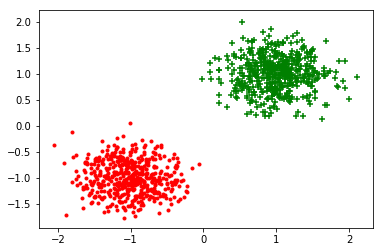

In [26]:

trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
plot_data(trainx,trainy)
plt.show()

On constate que sur des données linéairements séparables les différents noyaux obtiennent tous de bon scores,
Les noyaux linéaire et RBF obtiennent les meilleurs scores.

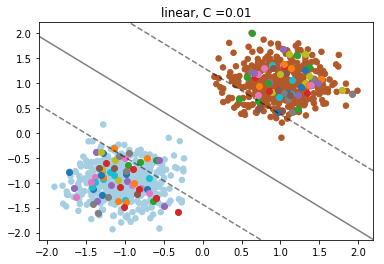

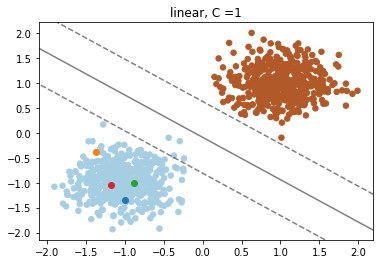

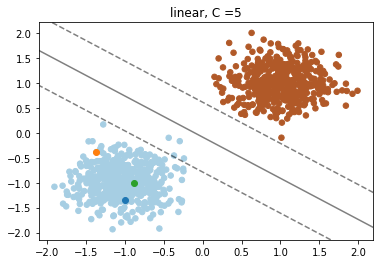

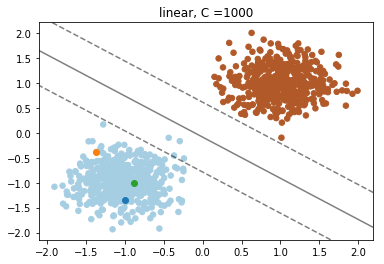

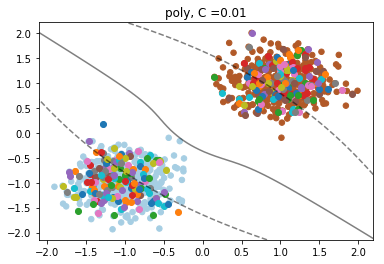

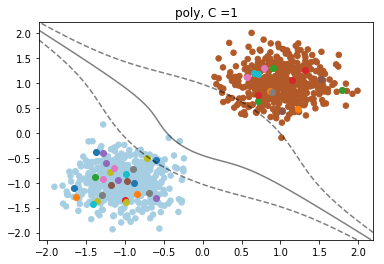

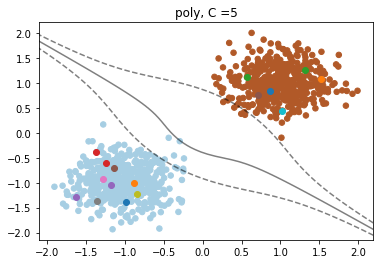

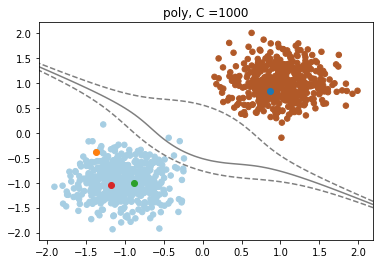

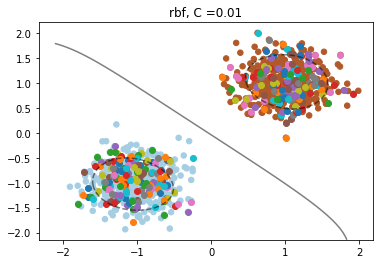

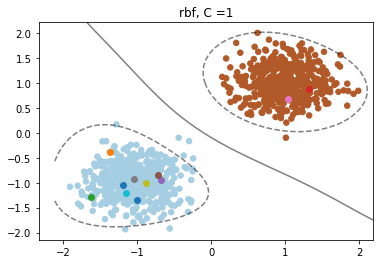

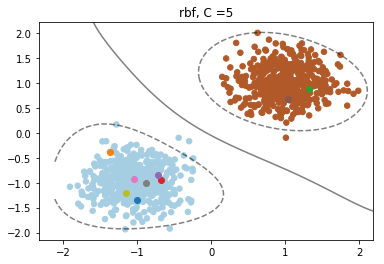

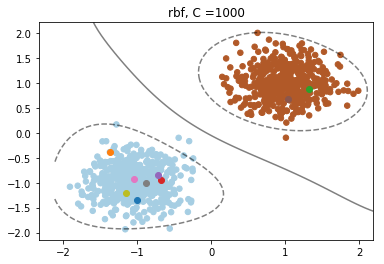

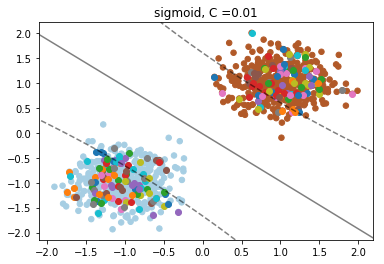

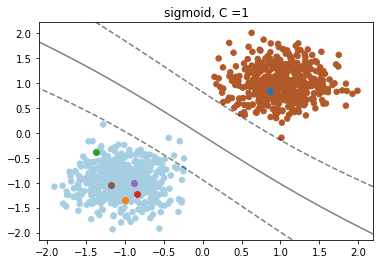

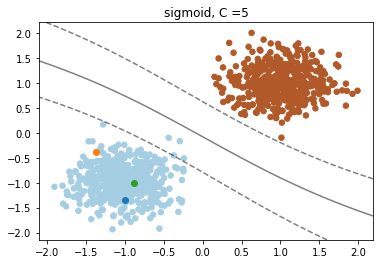

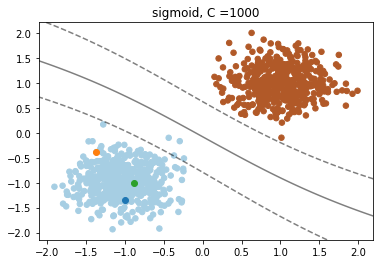

In [27]:
kernel = ['linear','poly','rbf','sigmoid']
C = [0.01, 1,5,1000]

svm = mySVM()

memo = dict()
for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints,c]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints,c]))
            

In [28]:
memo

{'linear': array([[  1.00000000e+00,   1.00000000e+00,   1.18000000e+02,
           1.00000000e-02],
        [  1.00000000e+00,   1.00000000e+00,   4.00000000e+00,
           1.00000000e+00],
        [  1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
           5.00000000e+00],
        [  1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
           1.00000000e+03]]),
 'poly': array([[  1.00000000e+00,   1.00000000e+00,   3.22000000e+02,
           1.00000000e-02],
        [  1.00000000e+00,   9.99000000e-01,   4.00000000e+01,
           1.00000000e+00],
        [  1.00000000e+00,   1.00000000e+00,   1.60000000e+01,
           5.00000000e+00],
        [  1.00000000e+00,   9.98000000e-01,   4.00000000e+00,
           1.00000000e+03]]),
 'rbf': array([[  1.00000000e+00,   1.00000000e+00,   3.05000000e+02,
           1.00000000e-02],
        [  1.00000000e+00,   1.00000000e+00,   1.10000000e+01,
           1.00000000e+00],
        [  1.00000000e+00,   1.00000000e+00,   9.00000000e+00

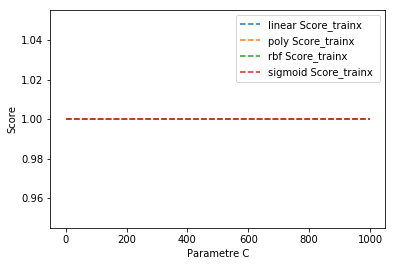

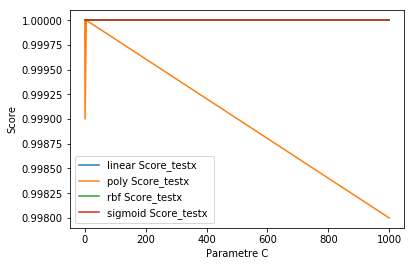

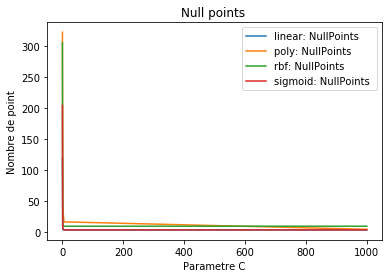

In [31]:
for m in memo.keys() :
    plt.plot(memo[m][0:,3],memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
    plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Parametre C')
 #plt.xlim(0,7)  
plt.show()

for m in memo.keys() :

    plt.plot(memo[m][0:,3],memo[m][0:,1],label=m + " Score_testx ")
    plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Parametre C')
 #plt.xlim(0,7)  
plt.show()



for m in memo.keys():
    plt.title("Null points ")
    plt.plot(memo[m][0:,3],memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.ylabel('Nombre de point')
plt.xlabel('Parametre C')

plt.legend(loc='best')
plt.show()

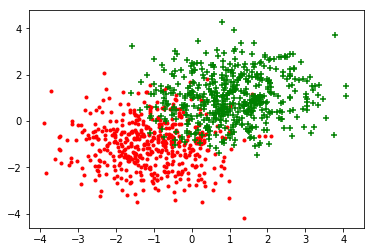

In [34]:
 ###Données  brutés 
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)
plot_data(trainx,trainy)
plt.show()   


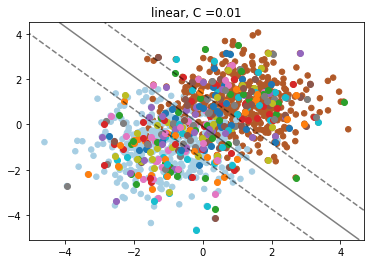

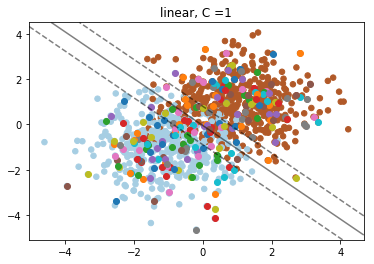

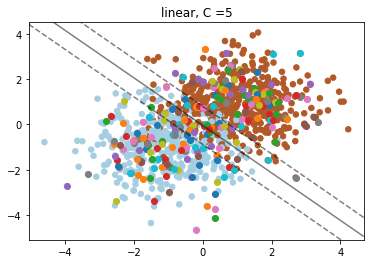

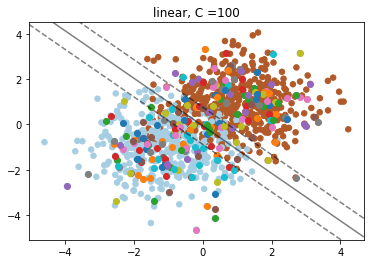

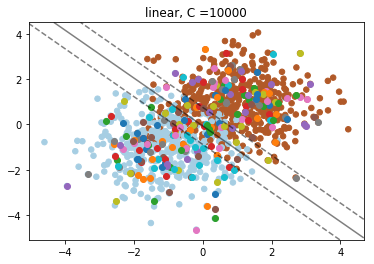

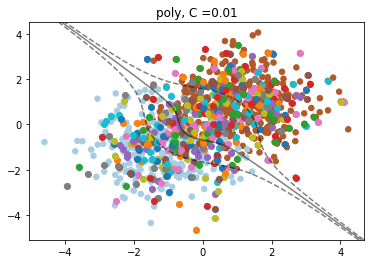

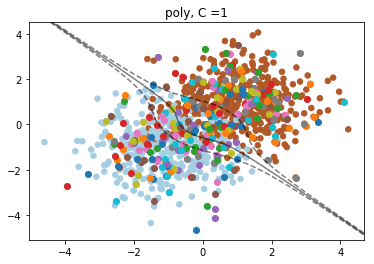

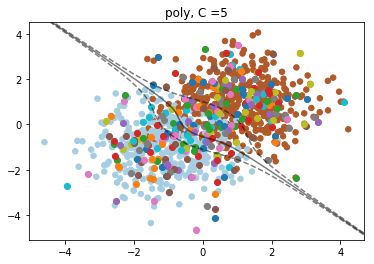

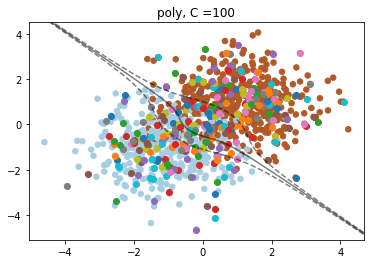

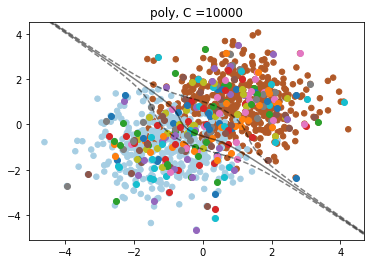

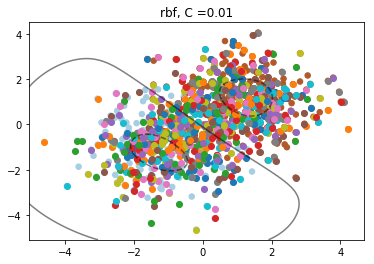

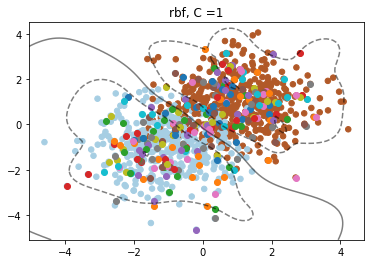

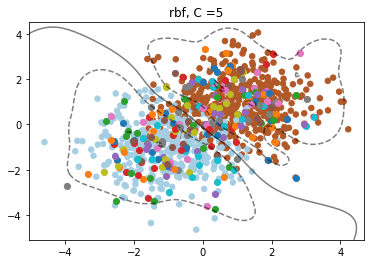

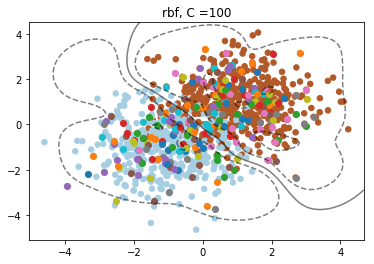

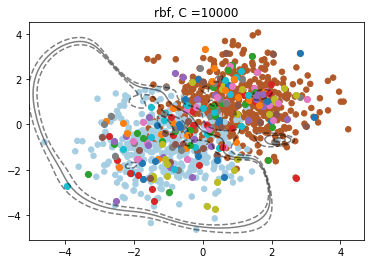

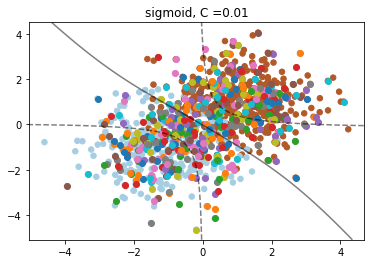

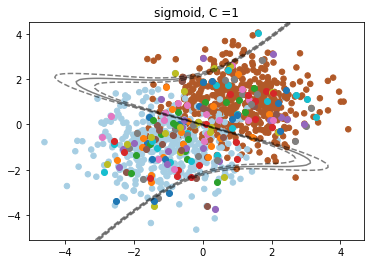

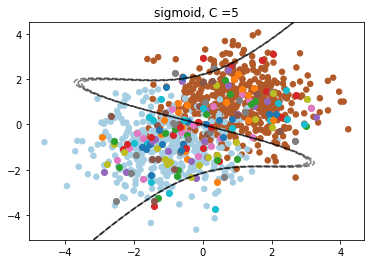

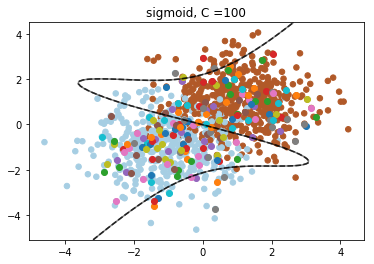

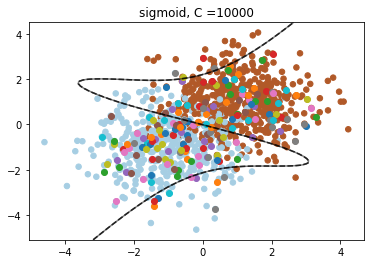

In [35]:
kernel = ['linear','poly','rbf','sigmoid']
C = [0.01, 1, 5,100, 10000]

svm = mySVM()

memo = dict()
for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints]))

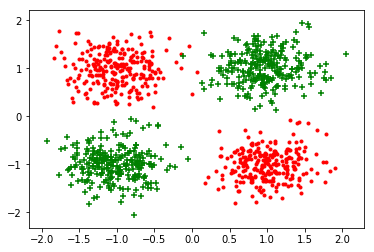

In [36]:
#Xor
 ###Données plus brutés 
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
plot_data(trainx,trainy)
plt.show()   

Remarque : Le paramètre C écarte la classification erronée des exemples d'apprentissage par rapport à la simplicité de la surface de décision. Un C faible rend la surface de décision lisse, on obtient plus de points avec un coef non null alors qu'un C élevé vise à classer correctement tous les exemples d'entraînement en donnant au modèle la liberté de sélectionner plus d'échantillons comme vecteurs de support.

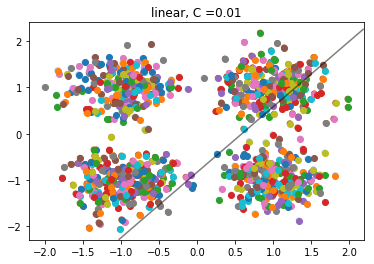

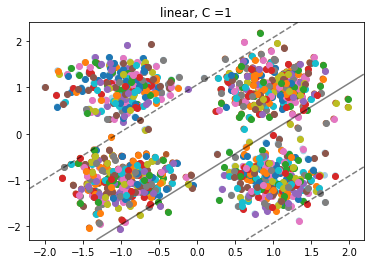

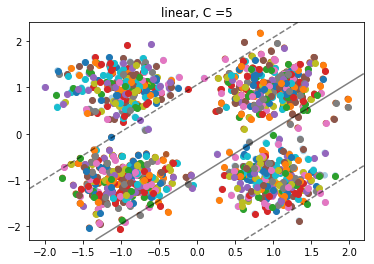

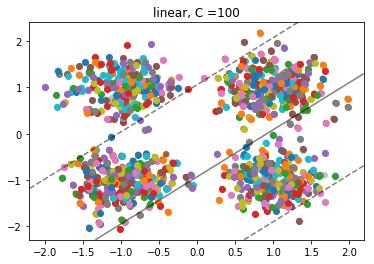

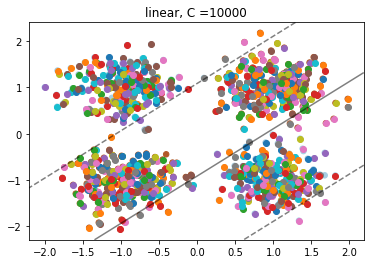

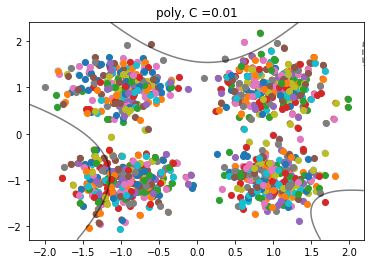

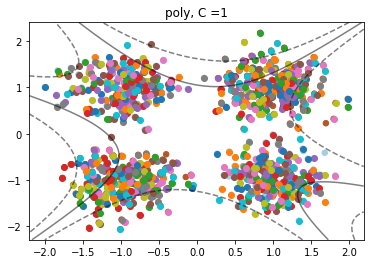

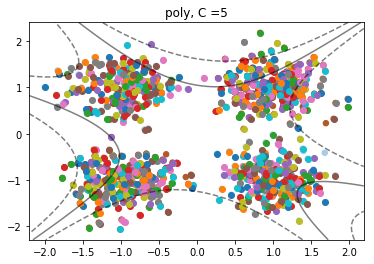

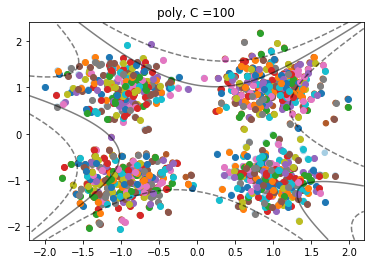

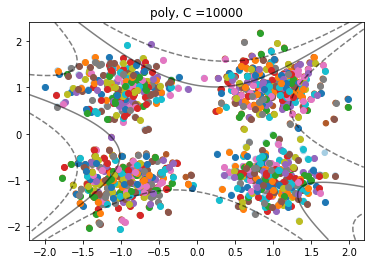

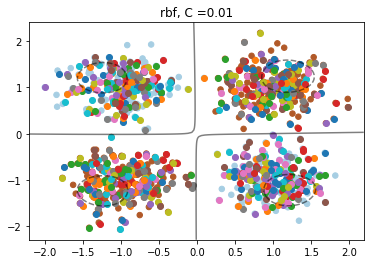

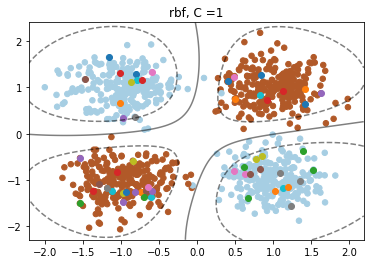

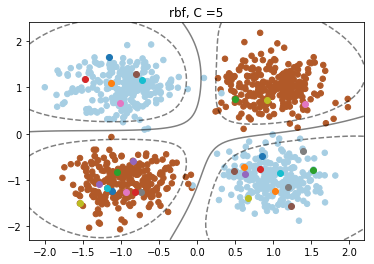

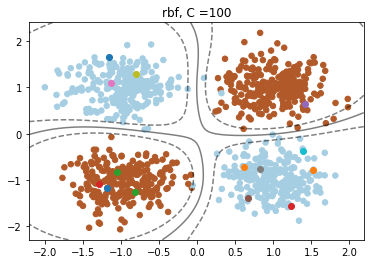

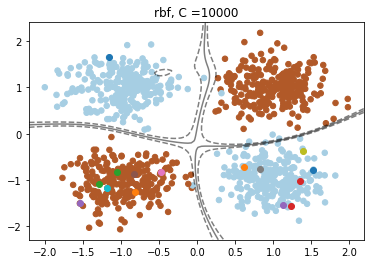

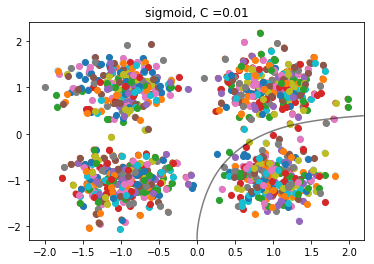

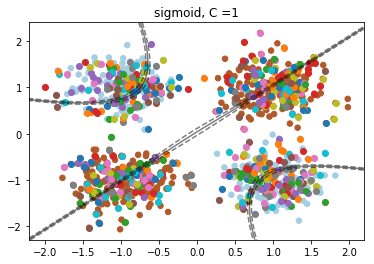

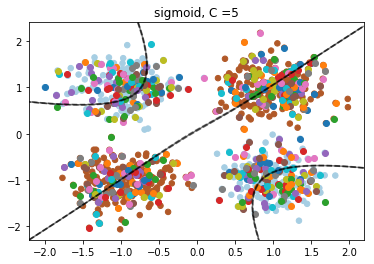

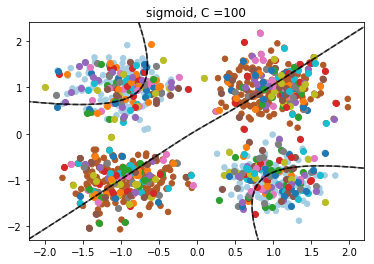

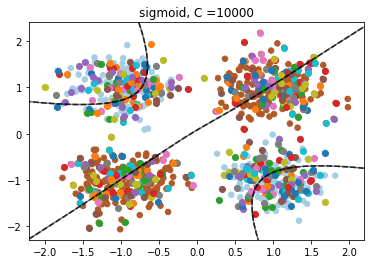

In [39]:
kernel = ['linear','poly','rbf','sigmoid']
C = [0.01, 1,5,100, 10000]

svm = mySVM()
memo = dict()

for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints]))
            

linear
poly
rbf
sigmoid


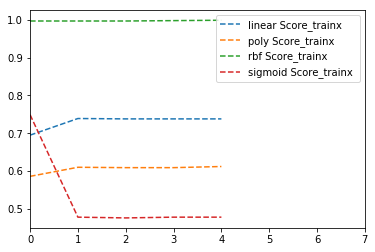

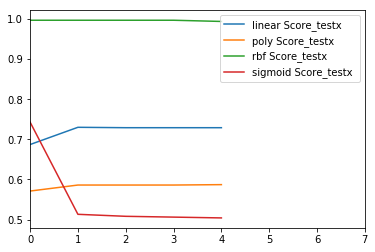

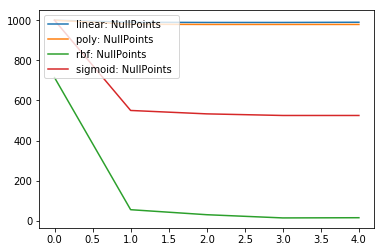

In [41]:
for m in memo.keys() :
    print(m)
    plt.plot(memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
plt.legend(loc='best')
plt.xlim(0,7)  
plt.show()

for m in memo.keys() :
    plt.plot(memo[m][0:,1],label=m + " Score_testx ")
plt.legend(loc='best')
plt.xlim(0,7)  
plt.figure(figsize = (20,10))
plt.show()

for m in memo.keys():
    plt.plot(memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.legend(loc='upper left')
plt.show()

Le nombre de points qui ont des coefficients non nulls varie en fonction des noyaux utilisés et du parametre C, plus la penalité attribué est grande moins il y'a de point dans la marge.
Sur des données non-linéairement séparables on constate que le noyau RBF est le seul à obtenir un bon score et à avoir une bonne résistance au bruit.

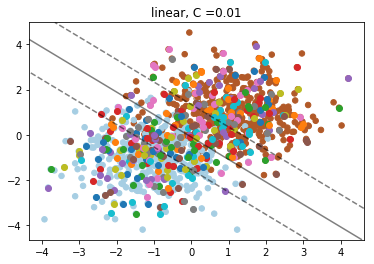

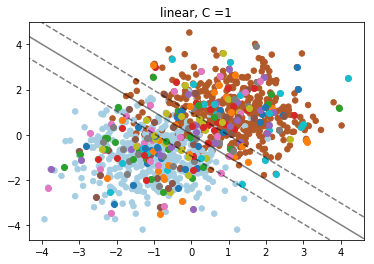

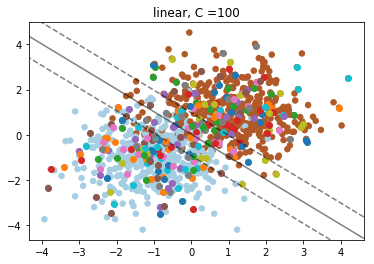

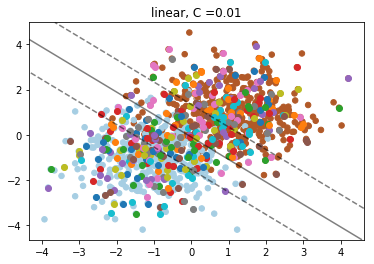

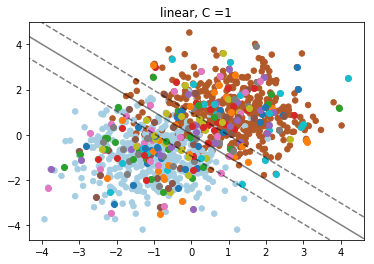

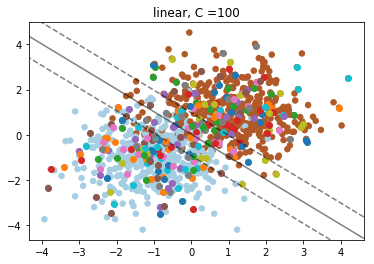

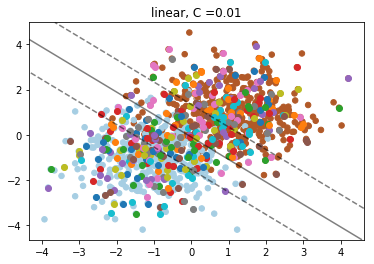

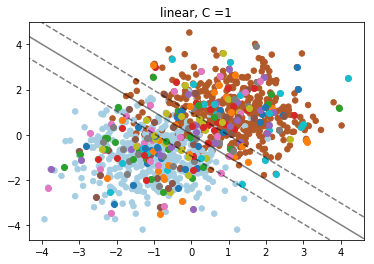

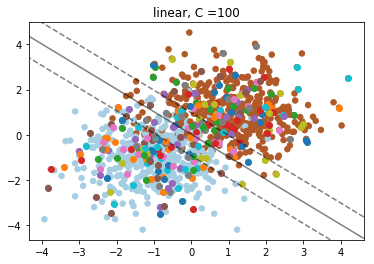

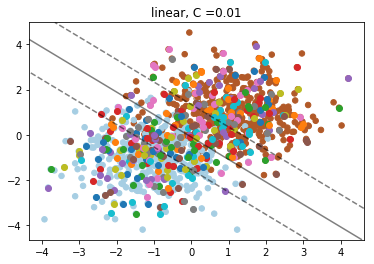

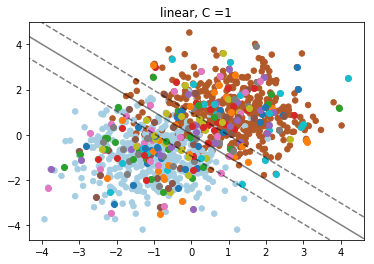

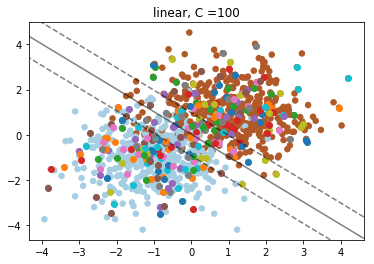

In [25]:
kernel = ['linear']
C = [0.01, 1, 100]
gamma = [0.001, 1, 10,100]
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)

memo2 = dict()

svm = mySVM()

for g in gamma:
    for c in C:   
        svm.fit(trainx,trainy,'linear',c,g)
        svm.affichage(testx,testy,g)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if g not in memo2.keys():
            memo2[g] = [scoreX,scoreY]
        else:
            memo2[g] = np.vstack(( memo2[g] ,[scoreX,scoreY]))


In [42]:
memo2

{0.001: array([[ 0.895,  0.918],
        [ 0.9  ,  0.913],
        [ 0.9  ,  0.912]]), 1: array([[ 0.895,  0.918],
        [ 0.9  ,  0.913],
        [ 0.9  ,  0.912]]), 10: array([[ 0.895,  0.918],
        [ 0.9  ,  0.913],
        [ 0.9  ,  0.912]]), 100: array([[ 0.895,  0.918],
        [ 0.9  ,  0.913],
        [ 0.9  ,  0.912]])}

In [43]:
class MonException(Exception):
    def __init__(self,raison):
        self.raison = raison
    
    def __str__(self):
        return self.raison
    
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.colorbar()

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()
    


In [46]:
    
datax_train, datay_train = load_usps("USPS/USPS_train.txt")
datax_test, datay_test   = load_usps("USPS/USPS_test.txt")

## Apprentissage multi-classe
----

### One vs All

La stratégie one-vs-all consiste à entraîner un seul classificateur par classe, avec les échantillons de cette classe comme échantillons positifs et tous les autres échantillons comme négatifs, on prend soin de melanger de chaque classe i et que la distributions les classes de l'esemble d'apprentissage soient equilibrées, avoir autant d'exemples positifs que d'exemples negatifs ( rebalancage des classes ).

Prendre des décisions signifie appliquer tous les classificateurs à un échantillon invisible x et prédire l'étiquette k pour laquelle le classificateur correspondant rapporte le score de confiance le plus élevé:
y^ =  argmax  fk(x) 
      k ∈ {1 ... K}
      
      
Cette stratégie est tres populaire, elle nous donne d'assez bon résultat et peu couteux en temps de calcule.

In [49]:
from random import shuffle

class OneVsAll:
    def __init__(self, kernel='linear', C=1):
        self.kernel = kernel
        self.C = C
    
    def fit(self, X, y):
        self.classes = sorted(set(y))
        self.clfs = [SVC(probability=True, kernel=self.kernel, C=self.C) for _ in range(len(self.classes))]
        for clf, cls in zip(self.clfs, self.classes):
            positifs = list(list(zip(*filter(lambda c: c[1] == cls, zip(X, y))))[0])
            negatifs = list(list(zip(*filter(lambda c: c[1] != cls, zip(X, y))))[0])
            #shuffle
            shuffle(positifs)
            shuffle(negatifs)
            #rebalancage des classes
            positifs = positifs[:min(len(positifs), len(negatifs))]
            negatifs = negatifs[:len(positifs)]
            #construction des labels binaires
            x_cls = positifs + negatifs
            y_cls = [1] * len(positifs) + [0] * len(positifs)
            #apprentissage
            clf.fit(x_cls, y_cls)
    
    def predict(self, X):
        probas = []
        for clf in self.clfs:
            probas.append(clf.predict_proba(X)[:, 1])
        probas = np.array(probas)
        return [self.classes[k] for k in probas.argmax(0)]
    
    def accuracy(self, X, y):
        return (np.array(self.predict(X)) == np.array(y)).mean()

In [50]:

#datay_train
kernel = ['linear','poly','rbf']

for k in kernel:
    print(k, end=':\t')
    clf = OneVsAll(kernel=k)
    clf.fit(datax_train, datay_train)
    print(clf.accuracy(datax_test, datay_test))

linear:	0.881415047334
poly:	0.921275535625
rbf:	0.929745889387


### One vs one 

La stratégie one vs one consiste a former  N(N - 1) / 2 classificateurs binaires, chacun reçoit les échantillons d'une paire de classes de l'ensemble d'apprentissage original, et doit apprendre à distinguer ces deux classes. 
Au moment de la prédiction, un système de vote est appliqué: tous les classificateurs K (K - 1) / 2 sont appliqués à un échantillon teste et la classe ayant obtenu le plus grand nombre de prédictions "+1" est prédite par le classificateur.One One vs one est beaucoup moins sensible aux problèmes d'ensembles de données déséquilibrés, mais est beaucoup plus coûteux en termes de calcul.


In [53]:
class OneVsOne:
    def __init__(self, kernel='linear', C=1):
        self.kernel = kernel
        self.C = C
    
    def fit(self, X, y):
        self.classes = sorted(set(y))
        self.clfs = {
            (c1, c2) : SVC(probability=True, kernel=self.kernel, C=self.C) 
            for i, c1 in enumerate(self.classes)
            for c2 in self.classes[i:]
        }
        for ((c1, c2), clf) in zip(self.clfs.keys(), self.clfs.values()):
            positifs = list(list(zip(*filter(lambda c: c[1] == c1, zip(X, y))))[0])
            negatifs = list(list(zip(*filter(lambda c: c[1] == c2, zip(X, y))))[0])
            #shuffle
            shuffle(positifs)
            shuffle(negatifs)
            #balancage
            positifs = positifs[:min(len(positifs), len(negatifs))]
            negatifs = negatifs[:len(positifs)]
            #binarisation des labels
            x_train = positifs + negatifs
            y_train = [1] * len(positifs) + [0] * len(negatifs)
            #apprentissage
            clf.fit(x_train, y_train)
    
    def predict(self, X):
        clfs_proba = {}
        for ((c1, c2), clf) in zip(self.clfs.keys(), self.clfs.values()):
            pred = clf.predict_proba(X)[:, 1]
            if c1 in clfs_proba:
                clfs_proba[c1].append(pred)
            else:
                clfs_proba[c1] = [pred]
            if c2 in clfs_proba:
                clfs_proba[c2].append(1 - pred)
            else:
                clfs_proba[c2] = [1 - pred]
        #faire le vote moyen par classifieur
        for k, p in zip(clfs_proba.keys(), clfs_proba.values()):
            clfs_proba[k] = np.array(p).mean(0)
        
        return list(map(
            lambda i: self.classes[i], 
            np.array([clfs_proba[k] for k in self.classes]).argmax(0)
        ))
    
    def accuracy(self, X, y):
        return (np.array(self.predict(X)) == np.array(y)).mean()

       

In [54]:
clf = OneVsOne()
clf.fit(datax_train[:] , datay_train[:] )

In [55]:
kernel = ['linear','rbf','poly','sigmoid']

for k in kernel:
    print(k, end=':\t')
    clf = OneVsOne(kernel=k)
    clf.fit(datax_train, datay_train)
    print(clf.accuracy(datax_test, datay_test))
    


linear:	0.925759840558
rbf:	0.941704035874
poly:	0.92874937718
sigmoid:	0.885899352267


# String kernel 

In [56]:
from collections import Counter

def string_similarity(s1, s2):
    w1 = s1.split()
    w2 = s2.split()
    common_words = set(w1).intersection(w2)
    c1 = Counter(w1)
    c2 = Counter(w2)
    return sum([c1[k] * c2[k] for k in common_words]) / (len(w1) + len(w2))

In [57]:
string_similarity("le chien mange le chat", "le chat est bleu")
string_similarity("le chien mange le chat", "le chat mange le chien")

0.7

In [65]:
from glob import glob
import codecs

In [66]:
files = glob("C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS/*.txt")

In [67]:
def read_file(path):
    f = codecs.open(path, encoding='utf-8')
    txt = f.read()
    f.close()
    return txt


In [68]:
texts = list(map(read_file, files))
#_ = texts.pop(7) 
print(len(texts))


files

6


['C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 2.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 3.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_avare.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_don_juan.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_medecin_malgre_lui.txt']

In [69]:
import re
import unicodedata

def unicode2ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def normalize_string(s):
    s = unicode2ascii(s.lower().strip())
    s = re.sub(r"([.!?])", r"\\1", s)
    s = re.sub(r"[^a-zA-Z]+", r" ", s)
    return s

In [70]:
texts = list(map(normalize_string, texts))

def remove_stop_words(txt):
    sw = 'alors au aucuns aussi autre avant avec avoir bon car ce cela ces ceux chaque ci comme comment dans des du dedans dehors depuis devrait doit donc dos debut elle elles en encore essai est et eu fait faites fois font hors ici il ils je juste la le les leur la ma maintenant mais mes mine moins mon mot meme ni nommes notre nous ou ou par parce pas peut peu plupart pour pourquoi quand que quel quelle quelles quels qui sa sans ses seulement si sien son sont sous soyez sujet sur ta tandis tellement tels tes ton tous tout trop tres tu voient vont votre vous vu ca etaient etat etions ete etre'.split()
    for w in sw:
        txt = txt.replace(' ' + w + ' ', ' ')
    return txt

texts = list(map(remove_stop_words, texts))

In [71]:
NB_WORDS_MIN = (min(list(map(lambda s: len(s.split()), texts))))
shorten_text = lambda s: ' '.join(s.split()[:NB_WORDS_MIN])


M = np.zeros((len(texts), len(texts)))
for i, t in enumerate(texts):
    for j, tt in enumerate(texts):
        M[i, j] = string_similarity(shorten_text(t), shorten_text(tt))

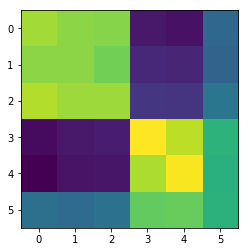

['C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 2.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 3.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_avare.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_don_juan.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_medecin_malgre_lui.txt']

In [72]:
plt.imshow(np.log(M) / np.log(M).sum(1))
plt.show()

files